## Election Sentiment Analysis Using NLP

This is a notebook by Ibrahim Ogunbiyi


### Inspiration
I had no intention of working on this project at first, but the aha moment came when I was surfing Twitter on a particular day and saw a tweet from a user you hyping one of the presidential candidates that day. So I just thought, what if I do an analysis to see where citizens who tweet about their favorite aspirants belong? (i.e. where do they reside in Nigeria). So I know whether people tweeting about Peter OBI are mostly from the South-South or Asiwaju Tinubu are mostly from the South West.


In [1]:
import re #for performing regular expression onstring() 
import string
import random
import numpy as np 
import pandas as pd
from PIL import Image # For reading image
from nltk import pos_tag # For assigning part of speech
from textblob import TextBlob #For getting polarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud #Vizualization of words
from nltk.corpus import stopwords # For removing stop words
from nltk.tokenize import word_tokenize # For manipulatiang string
from emot.emo_unicode import UNICODE_EMOJI # For Emoji
stop = stopwords.words("english")

pd.set_option("display.max_rows", 100)

In [2]:
df1 = pd.read_csv("NigeriaDecides2023")
df2 = pd.read_csv("Election2023")

In [3]:
df = pd.concat([df1, df2]).reset_index(drop=True)

In [4]:
df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Location
0,VictoriaTalker,2022-08-02 00:01:16+00:00,1,Twitter for Android,"... six months later, I've mastered all the no...","Abuja, Nigeria"
1,tooMuchGist_Com,2022-08-01 23:47:45+00:00,1,Twitter for Android,@ClemzyBoss it's time for election again! Tell...,Nigeria
2,DasFreidenker,2022-08-01 23:41:02+00:00,0,Twitter for Android,It is part of APC's strategy. In case Obi wins...,Planet Mars
3,emibest7,2022-08-01 23:35:06+00:00,3,Twitter Web App,I hear this song and am thinking this should b...,Nigeria
4,Brandescortinfo,2022-08-01 23:30:42+00:00,1,Twitter for Android,Why I rejected N10 million offer to endorse Ti...,"Lagos, Nigeria"


In [5]:
df[df.duplicated(subset=["Tweet"])]

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Location
921,Muhamma86493628,2022-07-28 06:17:01+00:00,0,Twitter for Android,#NigeriaDecides2023,Right here
966,AkinwunmiOjo,2022-07-27 21:38:06+00:00,0,Twitter for Android,#NigeriaDecides2023,NaN
2610,bamconcept,2022-07-17 19:40:04+00:00,0,Twitter for Android,"Get your PVC, have a say. It is possible, yes ...",Lagos Nigeria
3257,ayobami_AYO97,2022-07-15 16:57:37+00:00,0,Twitter for Android,#Lagos #funkeakindele #PDP #2023Elections #Pet...,"Abeokuta, Ogun State"
4555,kenedy1981,2022-07-08 22:50:17+00:00,0,Twitter for Android,Daddy Freeze Reacts After Peter Obi's Supporte...,"Lagos, Nigeria"
...,...,...,...,...,...,...
27800,Real_Ademi,2022-06-08 07:50:42+00:00,0,Twitter for Android,😂 AIT tagged APC primaries as Empires of Lies ...,"California, USA"
27806,alagbala777,2022-06-08 07:45:34+00:00,0,Twitter for Android,#2023Elections is between oppressors and the o...,"Lagos, Nigeria"
27863,ENDLESSRED1,2022-06-08 06:40:33+00:00,0,Twitter for Android,We cannot pretend that things will be alright ...,"Lagos, Nigeria"
27870,Nuella_ChessByD,2022-06-08 06:35:12+00:00,1,Twitter for Android,#APCPresidentialPrimaries watching the younger...,"Lagos, Nigeria"


## Drop Duplicates Rows

In [6]:
df.drop_duplicates(subset=["Tweet"], inplace=True)

In [7]:
df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Location
0,VictoriaTalker,2022-08-02 00:01:16+00:00,1,Twitter for Android,"... six months later, I've mastered all the no...","Abuja, Nigeria"
1,tooMuchGist_Com,2022-08-01 23:47:45+00:00,1,Twitter for Android,@ClemzyBoss it's time for election again! Tell...,Nigeria
2,DasFreidenker,2022-08-01 23:41:02+00:00,0,Twitter for Android,It is part of APC's strategy. In case Obi wins...,Planet Mars
3,emibest7,2022-08-01 23:35:06+00:00,3,Twitter Web App,I hear this song and am thinking this should b...,Nigeria
4,Brandescortinfo,2022-08-01 23:30:42+00:00,1,Twitter for Android,Why I rejected N10 million offer to endorse Ti...,"Lagos, Nigeria"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27184 entries, 0 to 27917
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User             27184 non-null  object
 1   Date Created     27184 non-null  object
 2   Number of Likes  27184 non-null  int64 
 3   Source of Tweet  27184 non-null  object
 4   Tweet            27184 non-null  object
 5   Location         21422 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


## Creating a Cleaning Text function

In [9]:
def cleanTweets(tweet):
    
    # Remove all url in tweet
    tweet = re.sub(r"https?\S+|www\S+", "", tweet)
    
    #Remove all mentions and hashtag from tweet
    tweet = re.sub(r"@\w+|#", "", tweet)
    
    #Remove newline character
    tweet = re.sub(r"\n", " ", tweet)
    
    # Remove Unicode characters(Emoji) from text
    tweet_token = word_tokenize(tweet)
    filtered_text = [text for text in tweet_token if text not in list(UNICODE_EMOJI.keys())]

    return " ".join(filtered_text)

In [10]:
# Apply the function on tweets
df["Tweet"] = df["Tweet"].apply(cleanTweets)

In [11]:
df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Location
0,VictoriaTalker,2022-08-02 00:01:16+00:00,1,Twitter for Android,"... six months later , I 've mastered all the ...","Abuja, Nigeria"
1,tooMuchGist_Com,2022-08-01 23:47:45+00:00,1,Twitter for Android,it 's time for election again ! Tell all the o...,Nigeria
2,DasFreidenker,2022-08-01 23:41:02+00:00,0,Twitter for Android,It is part of APC 's strategy . In case Obi wi...,Planet Mars
3,emibest7,2022-08-01 23:35:06+00:00,3,Twitter Web App,I hear this song and am thinking this should b...,Nigeria
4,Brandescortinfo,2022-08-01 23:30:42+00:00,1,Twitter for Android,Why I rejected N10 million offer to endorse Ti...,"Lagos, Nigeria"


## Lowering all the Tweets

In [12]:
df["Tweet"] = df["Tweet"].apply(lambda x : x.lower())

In [13]:
df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Location
0,VictoriaTalker,2022-08-02 00:01:16+00:00,1,Twitter for Android,"... six months later , i 've mastered all the ...","Abuja, Nigeria"
1,tooMuchGist_Com,2022-08-01 23:47:45+00:00,1,Twitter for Android,it 's time for election again ! tell all the o...,Nigeria
2,DasFreidenker,2022-08-01 23:41:02+00:00,0,Twitter for Android,it is part of apc 's strategy . in case obi wi...,Planet Mars
3,emibest7,2022-08-01 23:35:06+00:00,3,Twitter Web App,i hear this song and am thinking this should b...,Nigeria
4,Brandescortinfo,2022-08-01 23:30:42+00:00,1,Twitter for Android,why i rejected n10 million offer to endorse ti...,"Lagos, Nigeria"


## Removing Punctuation From Words

In [14]:
df["Tweet"] = df["Tweet"].apply(lambda x: re.sub(r"[^\w\s]", "", x))

## Removing Stop Words.

In [15]:
# Adding stop word that is not present
user_stopword = (["ive", "cant", "want", "nigeria", "amp", "rinuspace", "candidate", "youth","its", "year",
    "nigerian", "pvc", "2023election", "dont", "nigerians", "2023elections", "thing", "god", "youths",
    "nigeriadecide2023", "make", "even", "people", "election", "day", "way", "let", "lets", "thats",
    "president", "country", "nigeriadecides2023", "man", "vote", "time", "party", "elections",
    "apc's", "apc", "pdp", "choice", "please", "apcs", "rinuspaces", "labourparty", "getyourpvc"
])

full_stop_words = [] # Initialize a list that will contain all the stop words to be removed for this dataset.

alphabets = list(string.ascii_letters) # create a list of alphabets

full_stop_words.extend(stop + user_stopword + alphabets)


df["Tweet"] = df['Tweet'].apply(lambda x: " ".join([x for x in x.split() if x not in full_stop_words]))

## Extract only Nouns from Tweet.

In [16]:
def extract_only_noun(tweets):
    tweet_token = word_tokenize(tweets)
    tagged = pos_tag(tweet_token, tagset="universal")
    a = [item[0] for item in tagged if (item[1] == "NOUN" or item[1] == "X")]
    return " ".join(a) 

df["Tweet"] = df["Tweet"].apply(extract_only_noun)

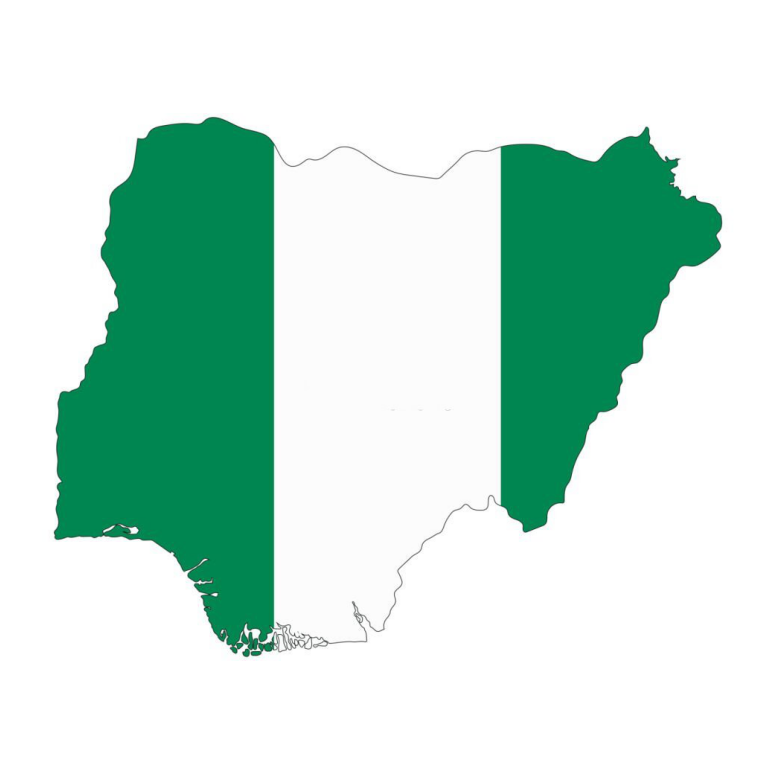

In [17]:
image = np.array(Image.open('Nigeria Flag.jpg'))    
plt.figure(figsize=(18, 14)) 
plt.imshow(image) 
plt.axis('off')
plt.show() 

In [18]:
# Create a Hue Saturation Lightness Color for Word Cloud.

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(132, 100%%, %d%%)" % random.randint(20, 40)

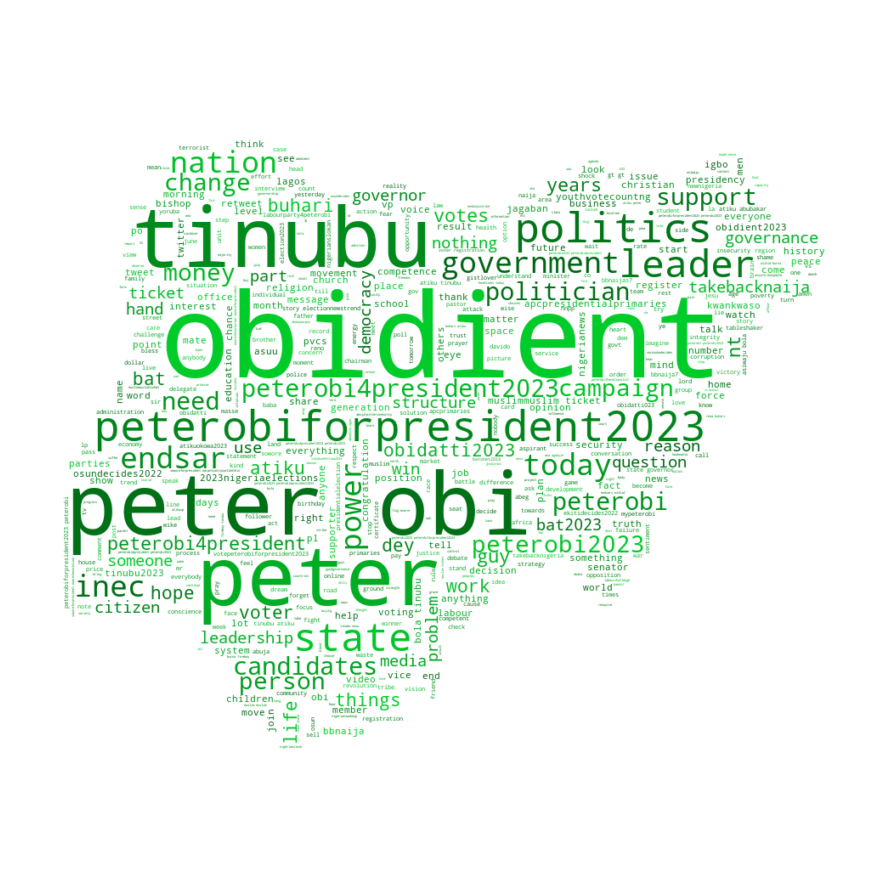

In [19]:
#Join all the tweets
full_tweet = " ".join(df["Tweet"])

# Instantiate The Word Cloud and Set it to contain maximum of 1000 words
nigeria_wc = WordCloud(background_color='white', max_words=1000, mask=image)

# generate the word cloud
nigeria_wc.generate(full_tweet)


# display the word cloud
plt.figure(figsize=(18, 16))
plt.imshow(nigeria_wc.recolor(color_func=green_color_func, random_state=42),
           interpolation="bilinear")
plt.axis('off')
plt.show()

# Working on Peter OBI dataset.

In [20]:
df1 = pd.read_csv("PeterObi")
df2 = pd.read_csv("OBIdient")
df = pd.concat([df1, df2]).reset_index(drop=True)
df

,User,Tweet,Location
0,menaz515,"@rizzza @austianmediarep @PeterObi ""Ogadika Ol...","Chicago, IL"
1,OneTrueNigerian,@benmurraybruce Support Peter Obi and you won'...,"New Jersey, USA"
2,John_chidubem1,@Makavelli275 @PeterObi @WilliamsRuto Amen🙏🙏🙏🇳🇬❤,Nigeria
3,elNasrino,@DekunleFolabi_T @donomum @PeterObi I'm just b...,"New York, USA"
4,EdificeExtract,@PeterObi for #President 2023 😎\n In al...,NaN
...,...,...,...
554465,JoelBri58609209,But na only one comment I made o. The attack d...,NaN
554466,Olabisioflagos,Wishing someone had died of poison years back ...,"Lagos, Nigeria"
554467,retinafu,Please do not miss the point. Peter Obi is a m...,"PHC, Nigeria"
554468,OgbeniJide,"@MrOdanz It's called Social Baptism, even if a...","Lagos, Nigeria"


## Dropping Duplicates Tweet.

In [21]:
df[df["Tweet"].duplicated()].head()

,User,Tweet,Location
179,francis_egbuonu,@AreaFada1 Peter obi,NaN
185,ladobilyaminu8,@AreaFada1 Peter Obi,NaN
303,lormarve,@AreaFada1 Peter Obi,"Owerri, Nigeria"
366,Kalexwizzil,@AreaFada1 Peter obi,university of maiduguri
378,harry_mpr1,@PeterObi @WilliamsRuto Obi,trenches


In [22]:
df.drop_duplicates(subset=["Tweet"], inplace=True)

In [23]:
df["User"].value_counts()

TryNaija          1921
BenueMentor       1194
WikeFanClub       1148
D_WarEagle         558
Clangbeat          486
                  ... 
jeffreyTK            1
Harriet_Zika         1
Ishaku72943317       1
UchegbuUgochi        1
OgbeniJide           1
Name: User, Length: 121170, dtype: int64

### Dropping Two Users

The reason why I'm dropping it is that one user is a bot and the other is like a new channel. As a data scientist you have to study your data.

In [24]:
df = df[df["User"] != "TryNaija"]

In [25]:
df = df[df["User"] != "WikeFanClub"]

## Dealing with the Tweet

In [26]:
def cleanTweets(tweet):
    
    # Remove all url in tweet
    tweet = re.sub(r"https?\S+|www\S+", "", tweet)
    
    #Remove all mentions and hashtag from tweet
    tweet = re.sub(r"@\w+|#", "", tweet)
    
    #Remove newline character
    tweet = re.sub(r"\n", " ", tweet)
    
    # Remove Unicode characters from text
    def remove_emojis(data):
        emoji = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"
                        "]+", flags = re.UNICODE)
        return re.sub(emoji, '', data)
    
    tweet = remove_emojis(tweet)
    
    return tweet

df["Tweet"] = df["Tweet"].apply(cleanTweets)

In [27]:
df.head()

,User,Tweet,Location
0,menaz515,"""Ogadika Olu Ebube"" by Patty Obasi","Chicago, IL"
1,OneTrueNigerian,Support Peter Obi and you won't even need a l...,"New Jersey, USA"
2,John_chidubem1,Amen,Nigeria
3,elNasrino,I'm just being sarcastic bro,"New York, USA"
4,EdificeExtract,for President 2023 In all your doing...,NaN


## Converting to Lower Case

In [28]:
df["Tweet"] = df["Tweet"].apply(lambda x : x.lower())

## Removing Punctuations and numbers

In [29]:
df["Tweet"] = df["Tweet"].apply(lambda x: re.sub(r"[^\w\s]|\d+", "", x))

### Create Subjectivity and Polarity From Tweet

In [30]:
df["Subjectivity"] = df["Tweet"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df["Polarity"] = df["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Dealing With Location

In [31]:
df

,User,Tweet,Location,Subjectivity,Polarity
0,menaz515,ogadika olu ebube by patty obasi,"Chicago, IL",0.000000,0.000000
1,OneTrueNigerian,support peter obi and you wont even need a la...,"New Jersey, USA",0.000000,0.000000
2,John_chidubem1,amen,Nigeria,0.000000,0.000000
3,elNasrino,im just being sarcastic bro,"New York, USA",0.800000,0.100000
4,EdificeExtract,for president in all your doings ge...,NaN,0.125000,0.000000
...,...,...,...,...,...
554463,Obidient_34,zack orji is now equal to disappointment so j...,Nigeria,0.362500,-0.075000
554464,gbonjunbolaO,my favourite obidient how you dey are you...,Lagos,0.000000,0.000000
554465,JoelBri58609209,but na only one comment i made o the attack do...,NaN,1.000000,0.000000
554466,Olabisioflagos,wishing someone had died of poison years back ...,"Lagos, Nigeria",0.555556,-0.566667


In [32]:
def remove_emojis(data):
        emoji = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"
                        "]+", flags = re.UNICODE)
        return re.sub(emoji, '', data)
    

df["Location"].fillna("###", inplace=True) 

df["Location"] = df["Location"].str.lower()
    
df["Location"] = df["Location"].apply(remove_emojis)

In [33]:
def sentiment_analysis(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Nuetral"
    else:
        return "Negative"
df["Analysis"] = df["Polarity"].apply(sentiment_analysis)

**Saving the dataset so I can visualize it in power BI**

In [34]:
df.to_csv("Peter OBI Sentiment.csv", index=False)

## Extraction of Location that Has Nigeria State


**The is the part I'm really intereseted in the Analysis** 

The reason why I'm doing this is I want to be focus on location that has nigeria state so I can visualize the data in power BI


In [35]:
df["Location"].value_counts().head(10)

###                               186129
nigeria                            52448
lagos, nigeria                     48379
abuja, nigeria                     15295
lagos                               9771
federal capital territory, nig      5122
port harcourt, nigeria              4735
abuja                               4511
earth                               3371
enugu, nigeria                      3250
Name: Location, dtype: int64

In [36]:
states_web = pd.read_html("https://en.wikipedia.org/wiki/List_of_capitals_of_states_of_Nigeria")[1]

states_web["State"].replace(to_replace="Abia State", value="Abia", inplace=True)

lst_of_states = states_web["State"].str.lower().tolist() + states_web["Capital"].str.lower().tolist() 

#lst_of_states.extend(["nigeria"])

In [37]:
def loop_through(loc):
    placeholder = False
    for i in lst_of_states:
        if i in loc:
            placeholder = True
            return placeholder
        else:
            placeholder = False
    return placeholder

In [38]:
df["Placeholder"] = df["Location"].apply(loop_through)

In [39]:
df.head()

,User,Tweet,Location,Subjectivity,Polarity,Analysis,Placeholder
0,menaz515,ogadika olu ebube by patty obasi,"chicago, il",0.000,0.0,Nuetral,False
1,OneTrueNigerian,support peter obi and you wont even need a la...,"new jersey, usa",0.000,0.0,Nuetral,False
2,John_chidubem1,amen,nigeria,0.000,0.0,Nuetral,True
3,elNasrino,im just being sarcastic bro,"new york, usa",0.800,0.1,Positive,False
4,EdificeExtract,for president in all your doings ge...,###,0.125,0.0,Nuetral,False


In [40]:
# Gotten the data I want to extract
nigeria_loc = df[df["Placeholder"] == True].reset_index(drop=True)
nigeria_loc["Location2"] = nigeria_loc["Location"].str.split(",", expand=True)[0]
nigeria_loc["Location2"].replace(to_replace="federal capital territory", value="abuja", inplace=True)
nigeria_loc.to_csv("Nigeria Location For Peter OBI.csv", index=False) 

## Visualizing Word Cloud

## Stop Words

In [41]:
user_stopword = ([
    "peter obi", "obi", "peter", "obidient", "obidatti", "president", "pvc", "vote",
    "even", "one", "obidiential", "amp", "see", "labour", "party", "na", "nigerian",
    "people", "come", "guy", "man", "know", "thats", "tinubu", "atiku", "time", "way",
    "nigeria", "nigerians", "po", "obidients", "apc", "pdp", "said", "dont", "want", "let",
    "need", "think", "support", "say", "bat", "movement", "im", "peterobi", "buhari", "candidate",
    "tell", "make", "go", "must", "hes"

    
])
full_stop_words = [] # Initialize a list that will contain all the stop words to be removed for this dataset.

alphabets = list(string.ascii_letters) # create a list of alphabets

full_stop_words.extend(stop + alphabets + user_stopword)


df["Tweet"] = df['Tweet'].apply(lambda x: " ".join([x for x in x.split() if x not in full_stop_words]))

I only want to extract Adjective, Noun, Verb and other part of speech from the tweet column

In [42]:
def extract_some_pos(tweets):
    tweet_token = word_tokenize(tweets)
    tagged = pos_tag(tweet_token, tagset = "universal")
    a = [item[0] for item in tagged if (item[1]== "NOUN" or item[1] == "VERB" or item[1] == "ADJ" or item[1] == "X")]
    return " ".join(a) 

df["Tweet"] = df["Tweet"].apply(extract_some_pos)

In [43]:
df.head()

,User,Tweet,Location,Subjectivity,Polarity,Analysis,Placeholder
0,menaz515,ogadika olu ebube patty obasi,"chicago, il",0.000,0.0,Nuetral,False
1,OneTrueNigerian,wont law achieved patriotism play talk sake vo...,"new jersey, usa",0.000,0.0,Nuetral,False
2,John_chidubem1,amen,nigeria,0.000,0.0,Nuetral,True
3,elNasrino,sarcastic bro,"new york, usa",0.800,0.1,Positive,False
4,EdificeExtract,doings get future,###,0.125,0.0,Nuetral,False


## Building Word Cloud

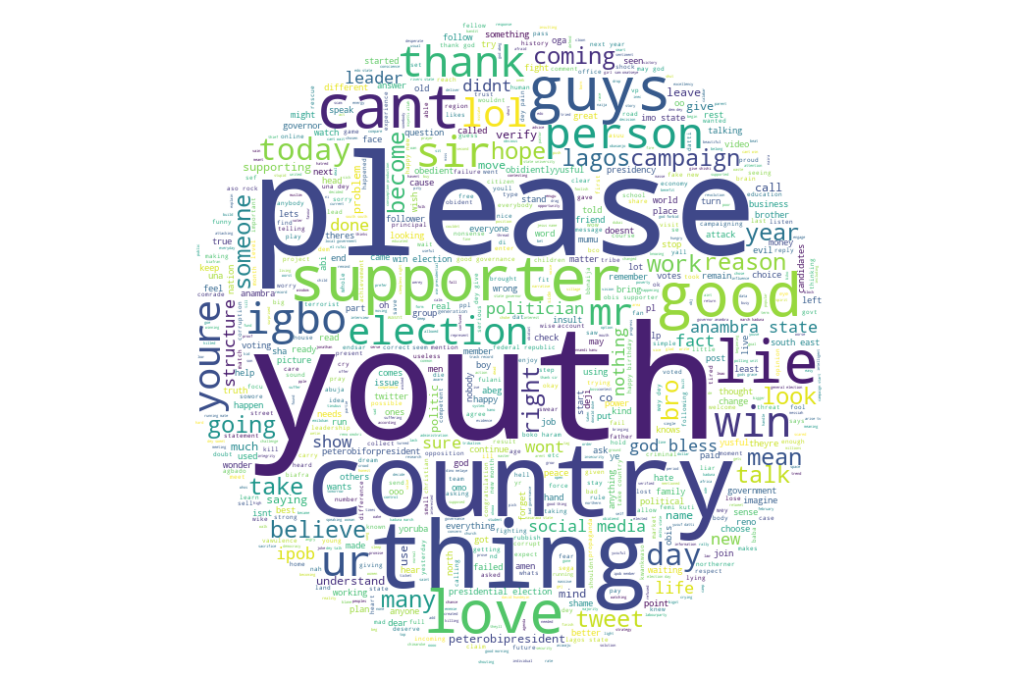

In [44]:
image = np.array(Image.open("bitcoin.jpg"))
full_tweet = " ".join(df["Tweet"])

obi_wc = WordCloud(background_color="white", max_words=2000, mask=image, random_state=42)
obi_wc.generate(full_tweet)
plt.figure(figsize=(18, 14)) 
plt.imshow(obi_wc, interpolation="bilinear")
plt.axis('off')
plt.show() 

In [45]:
df.head()

,User,Tweet,Location,Subjectivity,Polarity,Analysis,Placeholder
0,menaz515,ogadika olu ebube patty obasi,"chicago, il",0.000,0.0,Nuetral,False
1,OneTrueNigerian,wont law achieved patriotism play talk sake vo...,"new jersey, usa",0.000,0.0,Nuetral,False
2,John_chidubem1,amen,nigeria,0.000,0.0,Nuetral,True
3,elNasrino,sarcastic bro,"new york, usa",0.800,0.1,Positive,False
4,EdificeExtract,doings get future,###,0.125,0.0,Nuetral,False


# Working On Tinubu DataSet

In [46]:
a = pd.read_csv("BAT2023")
b = pd.read_csv("BAT23")
c = pd.read_csv("Tinubu")
df = pd.concat([a, b, c]).reset_index(drop=True)
df.head()

,User,Tweet,Location
0,youngdraynnet,@BAT2023_02_25 @DarlingtonDMay1 @Shola2Nautie ...,"Atlanta, GA"
1,ekok_kenneth,@BAT2023_02_25 @DarlingtonDMay1 @Shola2Nautie ...,Lagos
2,ekok_kenneth,@Shola2Nautie @BAT2023_02_25 @DarlingtonDMay1 ...,Lagos
3,BAT2023_02_25,@alexander_eji @smithbek782 @tosino52 Yeah as ...,NaN
4,alexander_eji,@BAT2023_02_25 @smithbek782 @tosino52 If he fa...,NaN


In [47]:
df.shape

(329510, 3)

## Dropping Duplicates Values

In [48]:
df[df["Tweet"].duplicated()]

,User,Tweet,Location
93,segilolaa,This can't be said about one container Economi...,Lagos
103,RealKSSO,#BATSHET2023\n“When I received my guest yester...,NaN
271,mrlurvy,"On February 9, 2000, Asiwaju Bola Ahmed Tinubu...",Nigeria
429,OlatunjiArije,Tinubu is expected to address members of his p...,Osogbo
431,tosino52,Tinubu is expected to address members of his p...,"Abuja, Nigeria"
...,...,...,...
328965,umarabdulbaba2,@officialABAT Next president inshallah,Nigeria
328982,uchestro,Observation: Why are BOLA AHMED TINUBU’S Suppo...,Winnipeg Manitoba Canada
329111,Danielkenz2,Zack Orji can support who he wants. He is an a...,NaN
329260,spychief,CAN and co are dividing Nigerians along religi...,"Abuja, Nigeria"


## Drop Duplicates Row

In [49]:
df.drop_duplicates(subset=["Tweet"], inplace=True)

## Dealing with the Tweet

In [50]:
def cleanTweets(tweet):
    
    # Remove all url in tweet
    tweet = re.sub(r"https?\S+|www\S+", "", tweet)
    
    #Remove all mentions and hashtag from tweet
    tweet = re.sub(r"@\w+|#", "", tweet)
    
    #Remove newline character
    tweet = re.sub(r"\n", " ", tweet)
    
    # Remove Unicode characters from text
    def remove_emojis(data):
        emoji = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"
                        "]+", flags = re.UNICODE)
        return re.sub(emoji, '', data)
    
    tweet = remove_emojis(tweet)
    
    return tweet

df["Tweet"] = df["Tweet"].apply(cleanTweets)

In [51]:
df.head()

,User,Tweet,Location
0,youngdraynnet,What's there in his tweet to counter? Do y...,"Atlanta, GA"
1,ekok_kenneth,Bro.. You have to rest.. Ever since that...,Lagos
2,ekok_kenneth,No be only counter...Na cover you go see.,Lagos
3,BAT2023_02_25,Yeah as the one wey fall ontop your papa de...,NaN
4,alexander_eji,If he fall upon he destiny na em be say jag...,NaN


## Converting to Lower Case

In [52]:
df["Tweet"] = df["Tweet"].apply(lambda x : x.lower())

## Removing Punctuations and numbers

In [53]:
df["Tweet"] = df["Tweet"].apply(lambda x: re.sub(r"[^\w\s]|\d+", "", x))

### Create Subjectivity and Polarity From Tweet

In [54]:
df["Subjectivity"] = df["Tweet"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df["Polarity"] = df["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Dealing With Location

In [55]:
def remove_emojis(data):
        emoji = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"
                        "]+", flags = re.UNICODE)
        return re.sub(emoji, '', data)
    
df["Location"] = df["Location"].str.lower()

df["Location"].fillna("###", inplace=True)    
    
df["Location"] = df["Location"].apply(remove_emojis)

df["Location"] = df["Location"].replace(to_replace=(["worldwide", "world", "earth",
                                   "heaven", "universe", "everywhere",
                                  "somewhere on earth", "global"]), value = "###")

In [56]:
def sentiment_analysis(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Nuetral"
    else:
        return "Negative"
df["Analysis"] = df["Polarity"].apply(sentiment_analysis)

In [57]:
df["Analysis"].value_counts(normalize=True)

Nuetral     0.421951
Positive    0.374581
Negative    0.203467
Name: Analysis, dtype: float64

In [58]:
df.to_csv("Tinubu Sentiment.csv", index=False)

## Extraction of Location that Has Nigeria State


**The is the part I'm really intereseted in the Analysis**

In [59]:
df["Placeholder"] = df["Location"].apply(loop_through)
nigeria_loc = df[df["Placeholder"] == True].reset_index(drop=True)
nigeria_loc["Location2"] = nigeria_loc["Location"].str.split(",", expand=True)[0]
nigeria_loc["Location2"].replace(to_replace="federal capital territory", value="abuja", inplace=True)
nigeria_loc.to_csv("Nigeria Location For Tinubu.csv", index=False) 

In [65]:
tinubu_stop = ["bola", "ahmed", "asiwaju-bola"]
full_stop_words.extend(tinubu_stop)

In [66]:
df["Tweet"] = df['Tweet'].apply(lambda x: " ".join([x for x in x.split() if x not in full_stop_words]))

In [71]:
def extract_some_pos(tweets):
    tweet_token = word_tokenize(tweets)
    tagged = pos_tag(tweet_token, tagset = "universal")
    a = [item[0] for item in tagged if (item[1]== "NOUN" or item[1] == "VERB" or item[1] == "ADJ" or item[1] == "X")]
    return " ".join(a) 

df["Tweet"] = df["Tweet"].apply(extract_some_pos)

In [72]:
df.head()

,User,Tweet,Location,Subjectivity,Polarity,Analysis,Placeholder
0,youngdraynnet,whats tweet counter mean saving disappearing h...,"atlanta, ga",0.687500,-0.312500,Negative,False
1,ekok_kenneth,bro rest exposed una vegetable sleepless night...,lagos,0.000000,0.000000,Nuetral,True
2,ekok_kenneth,counterna cover,lagos,1.000000,0.000000,Nuetral,True
3,BAT2023_02_25,fall ontop papa destiny wey loose papa,###,0.269231,-0.076923,Negative,False
4,alexander_eji,fall destiny em jagaban die,###,0.000000,0.000000,Nuetral,False


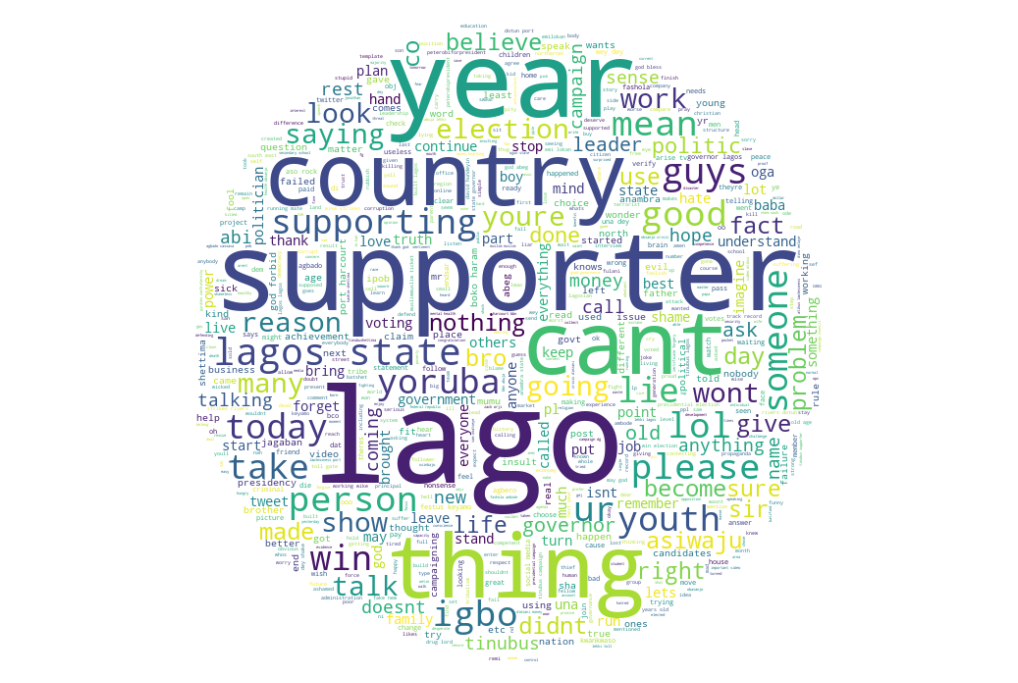

In [73]:
image = np.array(Image.open("bitcoin.jpg"))
full_tweet = " ".join(df["Tweet"])

bat_wc = WordCloud(background_color="white", max_words=2000, mask=image, random_state=42)
bat_wc.generate(full_tweet)
plt.figure(figsize=(18, 14)) 
plt.imshow(bat_wc, interpolation="bilinear")
plt.axis('off')
plt.show() 

### The rest will be done in Power BI. Thank you for taking your time to read my notebook. I hope you learnt new concepts from it.

### You can use this link to view my pages.

* [My Portfolio](http://bit.ly/ogunbiyiibrahim)
* [LinkedIn](https://www.linkedin.com/in/ibrahimogunbiyi/)
* [Twitter](https://twitter.com/comejoinfolks)